## This code performs an analysis of SENICDATA using SVM & KNN. 
### The data is from Applied Linear Statistical models (Kutner et.al) appendix C1. The data was collected as part of the study on the efficacy of nosocomial infection control (hospital acquired infection in US hospitals). 
### Variables are
* Sl. no - Identification number for hospitals (1-113) selected from original 338 hospitals during 1975-1976 study period. 
* Length of stay - Average length of stay of all patients (in days) 
* Age - Average age of patients (in years) 
* Routine culturing ratio - Ratio of number of cultures performed to number of patients w/o signs or symptoms of hospital-acquired infection, times 100 
* Region - Geographic region 1=NE, 2=NC, 3=S, 4=W 
* Average daily census - Average number of patients in hospital per day during study period 
* Available facilities and services - Percent of 35 potential facilities and services that are provided by the hospital 

#### Region is our target variable i:e we want to know if regions are predicted correctly or not based on other variables. 




###### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Import data 


In [2]:
df = pd.read_csv("senicdata.csv",index_col=0)

###### Preliminary data analysis


In [3]:
df.head()

,lengthofstay,age,routineculturingratio,avgdailycensus,availfacandservices,region
sl.no,,,,,,
1,7.13,55.7,9.0,207,60.0,4
2,8.82,58.2,3.8,51,40.0,2
3,8.34,56.9,8.1,82,20.0,3
4,8.95,53.7,18.9,53,40.0,4
5,11.20,56.5,34.5,134,40.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 1 to 113
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lengthofstay           113 non-null    float64
 1   age                    113 non-null    float64
 2   routineculturingratio  113 non-null    float64
 3   avgdailycensus         113 non-null    int64  
 4   availfacandservices    113 non-null    float64
 5   region                 113 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 6.2 KB


In [54]:
# Note that region is defined as an integer
df['region'] = df['region'].replace([1,2,3,4],
                        ['NE','NC','S','W'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 1 to 113
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lengthofstay           113 non-null    float64
 1   age                    113 non-null    float64
 2   routineculturingratio  113 non-null    float64
 3   avgdailycensus         113 non-null    int64  
 4   availfacandservices    113 non-null    float64
 5   region                 113 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ KB


In [55]:
df.head()

,lengthofstay,age,routineculturingratio,avgdailycensus,availfacandservices,region
sl.no,,,,,,
1,7.13,55.7,9.0,207,60.0,W
2,8.82,58.2,3.8,51,40.0,NC
3,8.34,56.9,8.1,82,20.0,S
4,8.95,53.7,18.9,53,40.0,W
5,11.20,56.5,34.5,134,40.0,NE


###### Some plots to explore


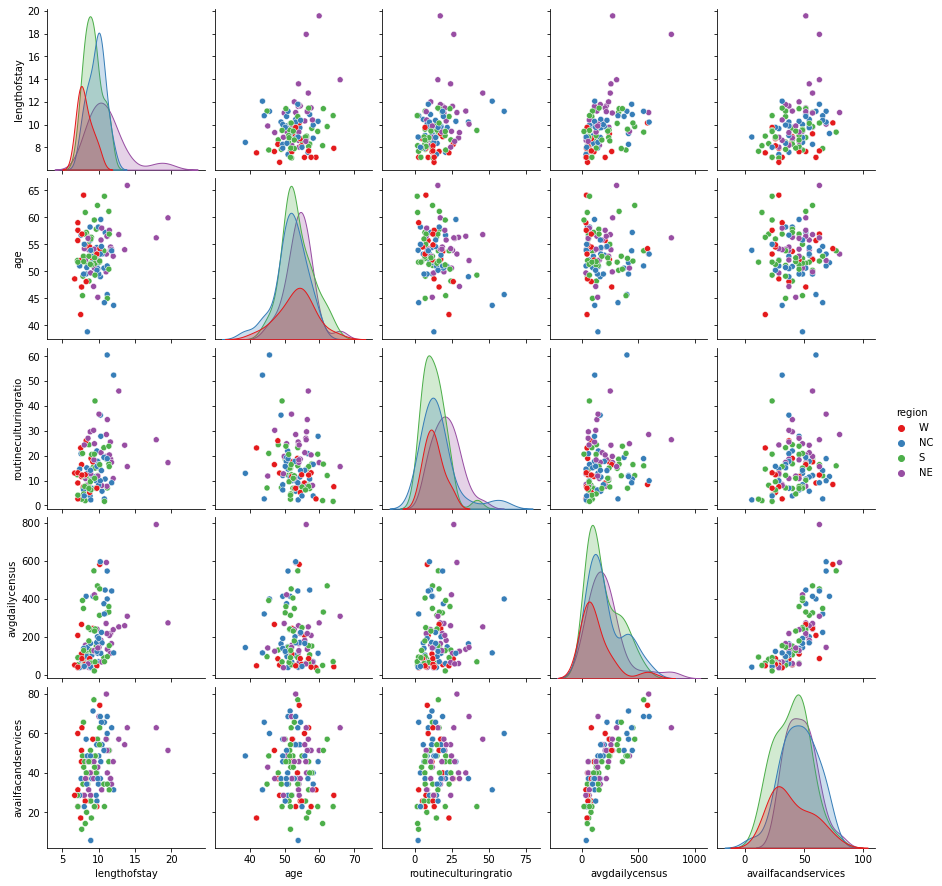

In [16]:

sns.pairplot(df,hue='region',palette='Set1')

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='lengthofstay'>

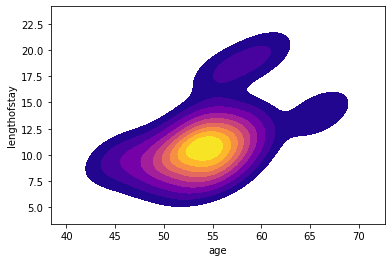

In [56]:
## Hard to see, but looks like North East region stands out 
NE = df[df['region']=='NE']
sns.kdeplot( NE['age'], NE['lengthofstay'],
                 cmap="plasma", shade=True, shade_lowest=False)

Text(0.5, 1.0, 'Boxplot for age v region')

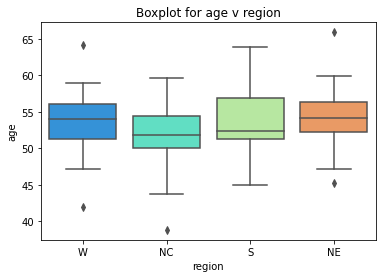

In [20]:
sns.boxplot(data=df,x="region", y="age",
            palette='rainbow').set_title('Boxplot for age v region')


Text(0.5, 1.0, 'Violin plot for age v region')

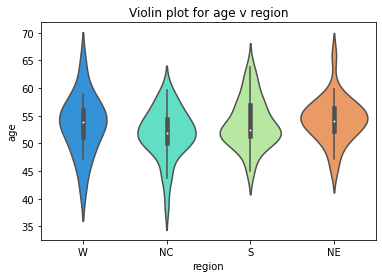

In [22]:
sns.violinplot(data=df,x="region", y="age",
            palette='rainbow').set_title('Violin plot for age v region')


Text(0.5, 1.0, 'Boxplot for length of stay v region')

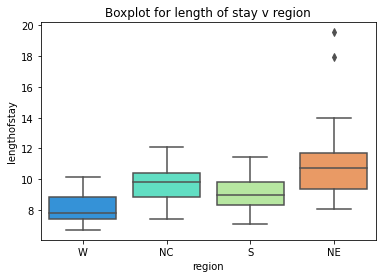

In [57]:
sns.boxplot(data=df,x="region", y="lengthofstay",
            palette='rainbow').set_title('Boxplot for length of stay v region')
# Patients from NE region have higher length of stay

Text(0.5, 1.0, 'Boxplot for culturing ratio v region')

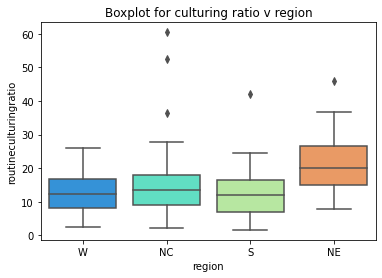

In [58]:
sns.boxplot(data=df,x="region", y="routineculturingratio",
            palette='rainbow').set_title('Boxplot for culturing ratio v region')
# Patients from NE region have higher culturing ratio as well

###### Import Scikit learn modules 


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

###### Split the dataset into train and test set

In [29]:
X = df.drop('region',axis=1)
y = df['region']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30)

###### Main SVM model

In [31]:
svc_model = SVC()

In [62]:
svc_model.fit(X_train,y_train)

SVC()

###### Getting predictions for testing set

In [63]:
predictions = svc_model.predict(X_test)

###### Confusion matrix and reports

In [35]:
print(confusion_matrix(y_test,predictions))

[[0 6 4 0]
 [0 4 1 0]
 [2 5 6 0]
 [0 3 3 0]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          NC       0.00      0.00      0.00        10
          NE       0.22      0.80      0.35         5
           S       0.43      0.46      0.44        13
           W       0.00      0.00      0.00         6

    accuracy                           0.29        34
   macro avg       0.16      0.32      0.20        34
weighted avg       0.20      0.29      0.22        34



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Trying the cross validation (CV)  with gridsearch method

In [44]:
param_grid = {'C': [0.1,0.2,0.5,1, 10, 100], 'gamma': [1,0.05,0.005,0.1,0.01,0.001]} 

In [64]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] ................................ C=0.1, gamma=0.05, total=   0.0s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=0.2, gamma=1, total=   0.0s
[CV] C=0.2, gamma=1 ..................................................
[CV] ................................... C=0.2, gamma=1, total=   0.0s
[CV] C=0.2, gamma=1 ..................................................
[CV] ................................... C=0.2, gamma=1, total=   0.0s
[CV] C=0.2, gamma=1 ..................................................
[CV] ................................... C=0.2, gamma=1, total=   0.0s
[CV] C=0.2, gamma=1 ..................................................
[CV] ................................... C=0.2, gamma=1, total=   0.0s
[CV] C=0.2, gamma=0.05 ...............................................
[CV] ................................ C=0.2, gamma=0.05, total=   0.0s
[CV] C=0.2, gamma=0.05 ...............................................
[CV] ................................ C=0.2, gamma=0.05, total=   0.0s
[CV] C=0.2, gamma=0.05 ...............................................
[CV] .

[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] ................................. C=1, gamma=0.005, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] ................................. C=1, gamma=0.005, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.5, 1, 10, 100],
                         'gamma': [1, 0.05, 0.005, 0.1, 0.01, 0.001]},
             verbose=2)

###### Getting predictions for testing set with 'best' parameter values

In [46]:
grid_predictions = grid.predict(X_test)

In [47]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [65]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

###### Confusion matrix and reports again! 

In [49]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[1 5 2 2]
 [1 3 1 0]
 [2 6 2 3]
 [1 2 1 2]]
              precision    recall  f1-score   support

          NC       0.20      0.10      0.13        10
          NE       0.19      0.60      0.29         5
           S       0.33      0.15      0.21        13
           W       0.29      0.33      0.31         6

    accuracy                           0.24        34
   macro avg       0.25      0.30      0.23        34
weighted avg       0.26      0.24      0.22        34



#### No real gain after applying CV method but the regions were not really separable to begin with

###### Onto KNN model

In [50]:
df = pd.read_csv("senicdata.csv",index_col=0)

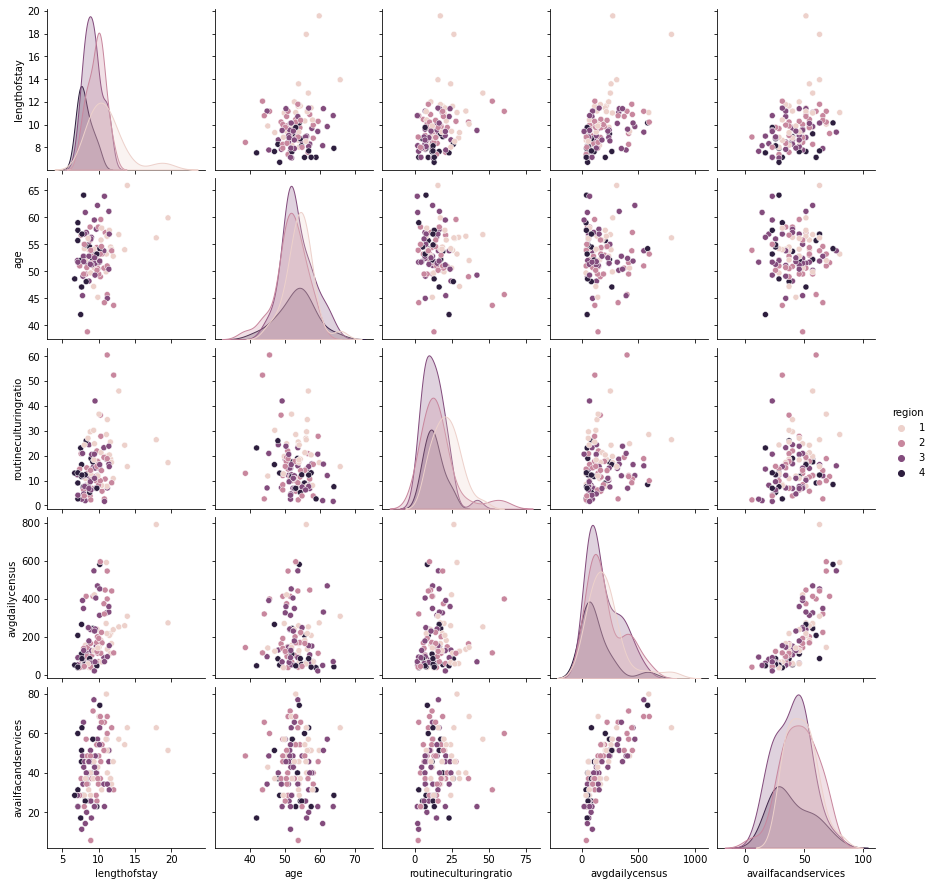

In [51]:
sns.pairplot(data=df,hue="region")

###### Import libraries for scaling the variables (because of distance metric) 

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('region',axis=1))

StandardScaler()

In [53]:
scaled_features = scaler.transform(df.drop('region',axis=1))

In [54]:
dffinal = pd.DataFrame(scaled_features,columns=df.columns[:-1])
dffinal.head() ## See if scaling has worked or not 

,lengthofstay,age,routineculturingratio,avgdailycensus,availfacandservices
0,-1.323356,0.555660,-0.666671,0.102094,1.112813
1,-0.435275,1.118492,-1.177009,-0.916996,-0.208762
2,-0.687511,0.825819,-0.754998,-0.714485,-1.530338
3,-0.366961,0.105394,0.304935,-0.903931,-0.208762
4,0.815396,0.735766,1.835950,-0.374788,-0.208762


###### Test train split for KNN

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = dffinal
y = df['region']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,random_state=2021)

###### Main KNN model

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
pred = knn.predict(X_test)

In [61]:
pred # predictions from KNN

array([1, 2, 3, 2, 4, 4, 2, 1, 2, 3, 1, 2, 1, 3, 3, 1, 3, 2, 3, 4, 3, 4,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 2, 4])

In [62]:
y_test


sl.no
14     2
43     3
3      3
36     1
23     1
9      3
35     2
38     3
100    3
48     2
83     4
57     4
29     1
46     4
31     1
5      1
59     2
101    4
44     3
111    4
82     2
89     1
85     3
109    2
73     3
81     2
104    1
76     4
78     2
102    1
66     1
80     2
7      3
108    2
Name: region, dtype: int64

In [63]:
y_test.sum()


80

In [64]:
pred.sum()

84

###### Generating reports

In [65]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2 2 3 2]
 [2 3 4 1]
 [1 3 4 1]
 [1 3 1 1]]
              precision    recall  f1-score   support

           1       0.33      0.22      0.27         9
           2       0.27      0.30      0.29        10
           3       0.33      0.44      0.38         9
           4       0.20      0.17      0.18         6

    accuracy                           0.29        34
   macro avg       0.28      0.28      0.28        34
weighted avg       0.29      0.29      0.29        34



###### Choosing the best k value by minimizing error

In [66]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

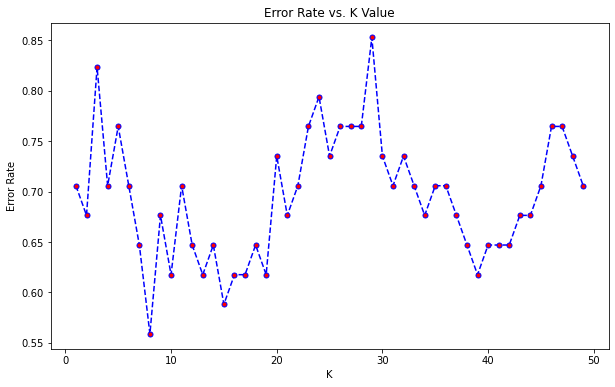

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
error_rate.index(max(error_rate))

28

In [69]:
error_rate.index(min(error_rate))

7

In [70]:
# K=1, for comparison 
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

K=1


[[2 2 3 2]
 [2 3 4 1]
 [1 3 4 1]
 [1 3 1 1]]


              precision    recall  f1-score   support

           1       0.33      0.22      0.27         9
           2       0.27      0.30      0.29        10
           3       0.33      0.44      0.38         9
           4       0.20      0.17      0.18         6

    accuracy                           0.29        34
   macro avg       0.28      0.28      0.28        34
weighted avg       0.29      0.29      0.29        34



In [71]:
# Now K=7...
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

K=7


[[3 4 2 0]
 [2 4 4 0]
 [1 3 5 0]
 [0 3 3 0]]


              precision    recall  f1-score   support

           1       0.50      0.33      0.40         9
           2       0.29      0.40      0.33        10
           3       0.36      0.56      0.43         9
           4       0.00      0.00      0.00         6

    accuracy                           0.35        34
   macro avg       0.29      0.32      0.29        34
weighted avg       0.31      0.35      0.32        34



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### KNN algorithm looks more promising compared to SVM 